<IPython.core.display.Javascript object>


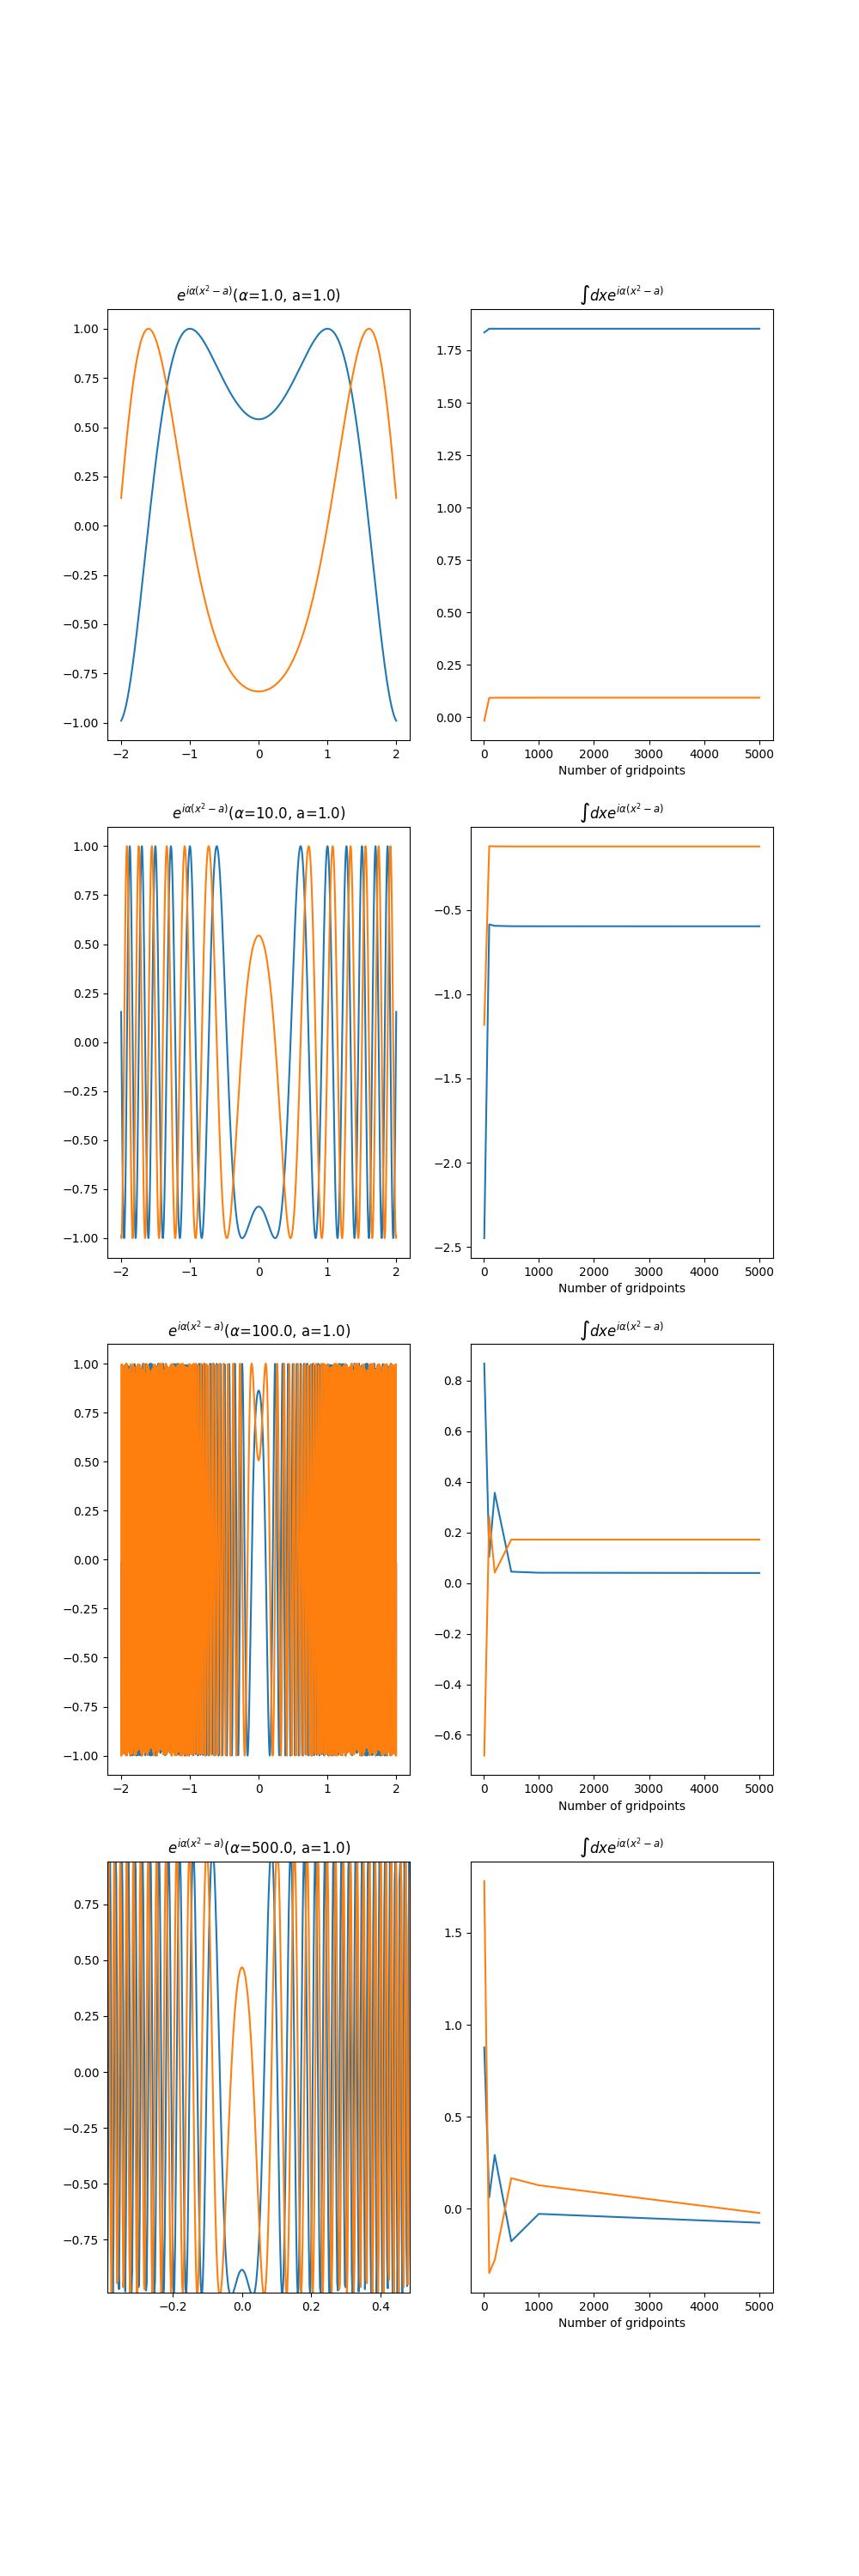

In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x=np.linspace(-2,2,2000)

def f_x(x,alpha,a):
    return np.exp(1.j*alpha*(x**2-a))

def int_f(x,alpha,a,Ngrid):
    
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        
    return I

    

alpha=10.0
a=1.0
# plt.plot(x,np.real(f_x(x,alpha,a)))
# plt.plot(x,np.imag(f_x(x,alpha,a)))

alpha_range=[1.0,10.0,100.0,500.0]
Ngrid_range=[10,100,200,500,1000,5000]

If_lst=[]
sp_lst=[]

# fig=plt.figure()
num_plots =len(alpha_range)
fig,axs=plt.subplots(num_plots,2,figsize=(10,30))




plt.title(r"$e^{i\alpha(x^2-a)}$")
for i,alpha in enumerate(alpha_range):
    If_lst=[]
    # look at convergence of numerical integration
    for num_points in Ngrid_range:
        If= int_f(x,alpha,a,num_points)
        If_lst.append(If)
    
#     ax=fig.add_subplot(num_plots*100+20+2*i+1)
    axs[i][0].plot(x,np.real(f_x(x,alpha,a)),label="Re")
    axs[i][0].plot(x,np.imag(f_x(x,alpha,a)),label="Im")
    axs[i][0].set_title(r"$e^{i\alpha(x^2-a)}$"+r"($\alpha$="+str(alpha)+", a="+str(a)+")")

    
#     ax2=fig.add_subplot(num_plots*100+20+2*i+2)
    axs[i][1].plot(Ngrid_range,np.real(If_lst),label="Re")
    axs[i][1].plot(Ngrid_range,np.imag(If_lst),label="Im")
    axs[i][1].set_xlabel("Number of gridpoints")
    axs[i][1].set_title(r"$ \int dx e^{i\alpha(x^2-a)}$")
    ax2.legend()


(1.8528987529543033+0.09197590468302451j)
(-0.37745896303183013-1.7317959997692363j)
(-0.5975341785414628-0.12401456914070891j)
(-0.11693813765709338+0.5481648815094505j)
(0.03962417263215709+0.17165566010768296j)
(0.17153916501658012-0.044612121685842596j)
(-0.07674999571754468-0.023210825022061177j)
(-0.023321105540920446+0.07575824274314207j)


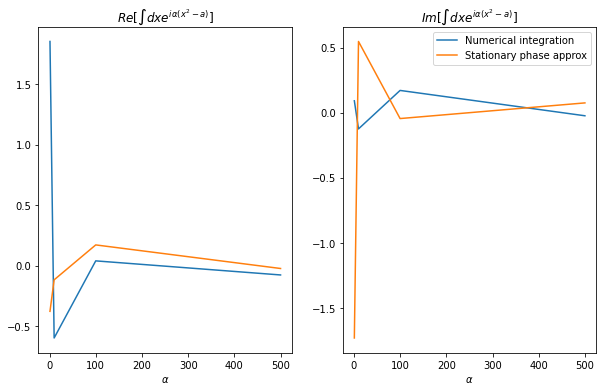

In [163]:
alpha_range=[1.0,10.0,100.0,500.0]
If_lst=[]
sp_lst=[]

for alpha in alpha_range:
    Ngrid=100*int(alpha)
    If= int_f(x,alpha,a,Ngrid)
    If_lst.append(If)
    print(If)

    sp_approx=np.sqrt(2.*np.pi/(2.j*alpha))*np.exp(-1.j*alpha*a)
    sp_lst.append(sp_approx)
    print(sp_approx)

fig2=plt.figure()
fig2.set_size_inches(10,6)

ax1=fig2.add_subplot(121)
ax1.set_title(r"$ Re[\int dx e^{i\alpha(x^2-a)}]$")
ax1.set_xlabel(r"$\alpha$")
plt.plot(alpha_range,np.real(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.real(sp_lst), label="Stationary phase approx")
ax2=fig2.add_subplot(122)
ax2.set_xlabel(r"$\alpha$")
ax2.set_title(r"$ Im[\int dx e^{i\alpha(x^2-a)}]$")

plt.plot(alpha_range,np.imag(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.imag(sp_lst), label="Stationary phase approx")
plt.legend()